In [393]:
import numpy as np
import math
from scipy.stats import poisson
import matplotlib.pyplot as plt

### Problem 1: The Frequentist method (3 points)


In [394]:
class Frequentist:
    #frequentist method
    def eq1(n_obs, mean):
        beta=[]
        #sum of poisson pmfs for n up to n_obs
        for n in range(n_obs+1):
            beta.append(poisson.pmf(n,mean))
        return np.sum(beta)

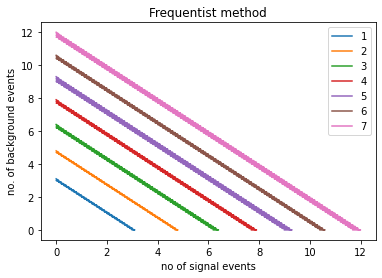

In [404]:
#create empty list of ns,nb pairs
pairs = []
n_obs = 6
count=0
while count <= n_obs:
    pairs = []
    nb=0
    # chose nb to be under 15
    while nb  < 15:
        ns=0
        # chose ns to be under 15
        while ns < 15:
            #mean as number of background plus number of signal events
            mean = nb+ns
            #get frequentist method using counter as no. events observed and mean
            beta = Frequentist.eq1(count,mean)
            #if beta is near 0.05 append it
            if 0.045 <= beta <=0.055:
                pairs.append((ns,nb))
            #add steps
            ns+=0.1
        nb+=0.1
    count+=1
    pairs_array =np.array(pairs)
    plt.plot(pairs_array[:,0],pairs_array[:,1],label=str(count))
plt.xlabel('no of signal events')
plt.ylabel('no. of background events')
plt.title('Frequentist method')
plt.legend()
plt.show()


### Problem 2: The Bayesian method (2 points)

In [40]:
class Bayesian:
    def eq4(n_obs, ns, nb):
        b1=[]
        b2=[]
        for n in range(n_obs+1):
            #get equation 4) 
            b1.append((nb+ns)**n / math.factorial(n))
            b2.append(nb**n/math.factorial(n))
        return np.exp(-ns)*np.sum(b1)/np.sum(b2)

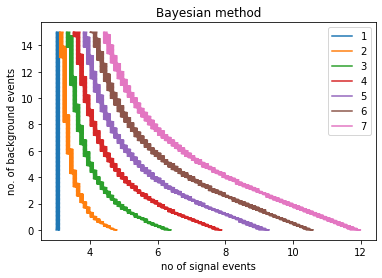

In [402]:
pairs = []
n_obs = 6
count=0
#get pairs for bayesian method for 6 observed events
while count <= n_obs:
    pairs = []
    nb=0
    while nb  < 15:
        ns=0
        while ns < 15:
            mean = nb+ns
            #get beta from bayesian method
            beta = Bayesian.eq4(count,ns,nb)
            #again if beta is near 0.05 append pairs to a list
            if 0.045 <= beta <=0.055:
                pairs.append((ns,nb))
            ns+=0.1
        nb+=0.1
    count+=1
    pairs_array =np.array(pairs)
    plt.plot(pairs_array[:,0],pairs_array[:,1],label=str(count))
plt.xlabel('no of signal events')
plt.ylabel('no. of background events')
plt.title('Bayesian method')
plt.legend()
plt.show()

These are the plots of number of signal events vs number of background events for 6 observations. The frequentist and bayesian method, whilst they return similar results they mean very different things. The limits are where we count events where we have a an average number of background events, and an unknown amount of signal events. The frequentist approach: 'if I have a signal, what is the probability that, given this observation, that I am going to miss out on a discovery'. We give an acceptance, here of beta = 5%.

In the frequentist model,the signal source is unknown, 'ns', the exclusion limit is the region n_s < n_upper, where n_upper is determined by finding the associated Type-II error which is 5%. In this model, the H1 model is either true (100%) or 0%.

In the Bayesian model there is a 'degree of belief' given  by 1-beta (95%), in this model we get a probability that H1 is true.

Here we get the n upper values. We can see that for high n obs, n upper (vs n signal) is similar for Frequentist and Bayesian however as n obs decreases we can see they are very different. n background is constant with respect to n upper for n obs = 1

For the frequentist method, the n_upper vs n_background is constant in shape for different n obs, but shifted up for more observations.

For the bayesian method, the number of observations directly affects this ratio - starting as constant in n_background and being stretched for more observations.

We can see that the Bayesian limits are more conservative than frequentist ones as for nb > 0, Bayesian upper limits go to greater values than classical ones, as the curves are all squashed up to ~14.

### Problem 3: The CLs method (5 points)


#### 3a)

In [398]:
#get mass range
mx = np.linspace(100,600)
#define constants
lambda_s = 1/600
lambda_b = 1/200
S = 7
B = 14
#expected background and signal events
nb_exp = B*np.exp(-lambda_b*mx)
ns_exp = S*np.exp(-lambda_s*mx)

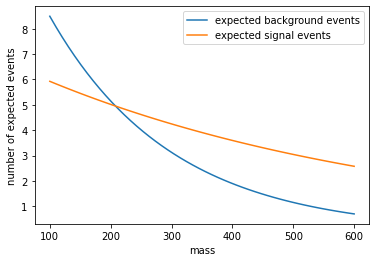

In [405]:
plt.plot(mx,nb_exp,label='expected background events')
plt.plot(mx,ns_exp,label='expected signal events')
plt.xlabel('mass')
plt.ylabel('number of expected events')
plt.legend()
plt.show()

The number of events, as a function of mass. We can see that number of background events dominates for a lower mass, and after around 200 MeV, the number of signal events dominates for higher masses.

#### 3b)

In [406]:
def data_H0():
    #mass = 300MeV
    mx = 300
    test_stat = []
    #get mean values (x)
    nb_exp = B*np.exp(-lambda_b*mx)
    ns_exp = S*np.exp(-lambda_s*mx)
    for i in range(2000):
        #get random number from poisson distribution with no. background events (H0)
        n_H0 = poisson.rvs(nb_exp)
        #get likelihood from probability mass function of poisson
        L_H0 = poisson.pmf(n_H0,nb_exp)
        L_H1 = poisson.pmf(n_H0,(nb_exp+ns_exp))
        #get test statistic for all masses
        t = -2*np.log(L_H1/L_H0)
        test_stat.append(t)
    return test_stat

In [407]:
def data_H1():
    mx = 300
    test_stat = []
    nb_exp = B*np.exp(-lambda_b*mx)
    ns_exp = S*np.exp(-lambda_s*mx)
    for i in range(2000):
        #get random number from poisson distribution with no. background + signal events (H1)
        n_H1 = poisson.rvs(nb_exp+ns_exp)
        #get likelihood from probability mass function of poisson using H1 statistic
        L_H0 = poisson.pmf(n_H1,nb_exp)
        L_H1 = poisson.pmf(n_H1,(nb_exp+ns_exp))
        t = -2*np.log(L_H1/L_H0)
        test_stat.append(t)

    return test_stat

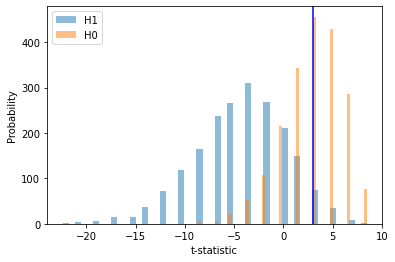

In [408]:
#get two histograms of H1 and H0 events
n1, bins1, patches1 = plt.hist(data_H1(),alpha=0.5,bins=50,label='H1')
n0, bins0, patches0 = plt.hist(data_H0(),alpha=0.5,bins=50,label='H0')
plt.axvline(bins0[np.argmax(n0)],color='b')
plt.xlabel('t-statistic')
plt.ylabel('Probability')
plt.legend()
plt.show()

#### 3c)

In [409]:
#get the t observed from the maximum number of entries
tobs = bins0[np.argmax(n0)]
tobs

2.9983250223953917

In [410]:
#CL for the background is sum of the number of entries above t obs +(1/2 * no.values at t obs)
CL_B = (np.sum(n0[np.argmax(n0)+1:]) + 0.5*n0[np.argmax(n0)])/2000
CL_B

0.509

In [411]:
#get index where H1 corresponds to tobs
index = np.abs(bins1-tobs).argmin()

In [412]:
#get CL for the signal plus background using the corresponding index where t_obs lies,
CL_SB = (bins1[index]*0.5 + np.sum(bins[index+1:]))/2000

In [413]:
#get CL for the signal as a fraction over them 
CL_s = CL_SB/CL_B

In [414]:
#confidence level for signal at mass = 300MeV
CL_s

0.0014389298721638622

#### 3d)

In [419]:
#define functions that take in mass as an argument
#gets H0 statistics
def data_H0(mx):
    test_stat = []
    nb_exp = B*np.exp(-lambda_b*mx)
    ns_exp = S*np.exp(-lambda_s*mx)
    for i in range(2000):
        n_H0 = poisson.rvs(nb_exp)
        L_H0 = poisson.pmf(n_H0,nb_exp)
        L_H1 = poisson.pmf(n_H0,(nb_exp+ns_exp))
        t = -2*np.log(L_H1/L_H0)
        test_stat.append(t)
    return test_stat

In [420]:
#gets H1 statistics
def data_H1(mx):
    test_stat = []
    nb_exp = B*np.exp(-lambda_b*mx)
    ns_exp = S*np.exp(-lambda_s*mx)
    for i in range(2000):
        n_H1 = poisson.rvs(nb_exp+ns_exp)
        L_H0 = poisson.pmf(n_H1,nb_exp)
        L_H1 = poisson.pmf(n_H1,(nb_exp+ns_exp))
        t = -2*np.log(L_H1/L_H0)
        test_stat.append(t)

    return test_stat

In [421]:
#create a function that loops over mass ranges, and returns CL_s
def partd():
    CL_s = []
    mass_range = np.linspace(100,600,20)
    #loop through masses
    for mx in mass_range:
        #get values and bin edges from histogram
        n1, bins1, _ = plt.hist(data_H1(mx),alpha=0.5,bins=50,label='H1')
        n0, bins0, _ = plt.hist(data_H0(mx),alpha=0.5,bins=50,label='H0')
        #dont let histograms print
        plt.close()
        #get t obs from maximum entries in H0 data
        tobs = bins0[np.argmax(n0)]
        #get CL of background by sum of H0 entries above t_obs given by H0
        CL_B = (np.sum(n0[np.argmax(n0)+1]) + 0.5*n0[np.argmax(n0)])/2000
        #get CL of signal by sum of H1 entries above t_obs given by H0
        idx = [np.abs(bins1-tobs).argmin()]
        #add a statement that if the index of t obs is the last entry of H1, just get the last entry
        if idx == len(n1):
            CL_SB = n1[idx-1]*0.5/2000
        else:
            CL_SB = (n1[idx]*0.5 + np.sum(n1[idx+1:]))/2000
        CL_s.append(CL_SB/CL_B)
    return CL_s

In [422]:
CL_s = []
mass_range = np.arange(100,600,20)
for mx in mass_range:
    H1 = data_H1(mx)
    H0 = data_H0(mx)
    n1, bins1, _ = plt.hist(H1,alpha=0.5,bins=100,label='H1')
    n0, bins0, _ = plt.hist(H0,alpha=0.5,bins=100,label='H0')
    plt.close()
    tobs = bins0[np.argmax(n0)]
    CL_B = (np.sum(n0[np.argmax(n0)+1:]) + 0.5*n0[np.argmax(n0)])/2000
    idx = np.abs(bins1-tobs).argmin()
    if idx == len(n1):
        CL_SB = n1[idx-1]*0.5/2000
    else:
        CL_SB = (n1[idx]*0.5 + np.sum(n1[idx+1:]))/2000
    CL_s.append(CL_SB/CL_B)

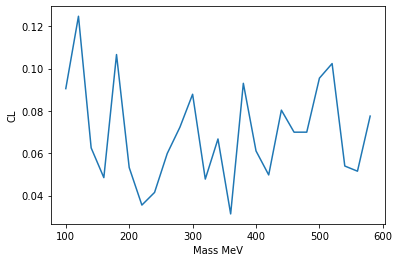

In [424]:
plt.plot(mass_range,CL_s)
plt.ylabel('CL')
plt.xlabel('Mass MeV')
plt.show()

I think this plot isnt working however I think this function should have a bump at the real particle mass. From the graph that is 3a), we would expect when the mass goes above a certain threshold, CL of signal will increase, however it is very jumpy and random, but that the expected trend should mean that when the mass threshold is reached where number of expected signal events are greater than the number of expected background events ~200 MeV, there will be a spike in confidence level.